In [1]:
from sklearn import metrics, linear_model
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from IPython.display import Image
from mylibs import metrics as mt
from mylibs import linear_model as lm

01. Crie os seguintes arquivos com extensão .py e implemente os métodos definidos para cada um deles:
    * metrics.py - métricas de classificação (ver slides e jupyter notebooks correspondentes). As métricas devem funcionar para classificação binária ou mesmo para múltiplas classes.
        - accuracy
        - precision
        - recall
        - f1_measure

    * linear_model.py
        - Implemente a classe LogisticRegression para realizar classificação binária.
        - Você pode adaptar o exemplo do seguinte link para tomar como base inicial para a sua implementação da regressão logística, que deve ter os métodos fit e predict. Explicação mais detalhada neste outro link.

In [2]:
y = ['cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat',
'dog', 'dog', 'dog', 'dog', 'dog', 'dog',
'rabbit', 'rabbit', 'rabbit', 'rabbit', 'rabbit', 'rabbit', 'rabbit', 'rabbit',
'rabbit', 'rabbit', 'rabbit', 'rabbit', 'rabbit']

y_pred = ['cat', 'cat', 'cat', 'cat', 'cat', 'dog', 'dog', 'dog',
'cat', 'cat', 'dog', 'dog', 'dog', 'rabbit',
'dog', 'dog', 'rabbit', 'rabbit', 'rabbit', 'rabbit', 'rabbit', 'rabbit',
'rabbit', 'rabbit', 'rabbit', 'rabbit', 'rabbit']
cm = metrics.confusion_matrix(y, y_pred, labels=['cat', 'dog', 'rabbit'])
print(cm)

[[ 5  3  0]
 [ 2  3  1]
 [ 0  2 11]]


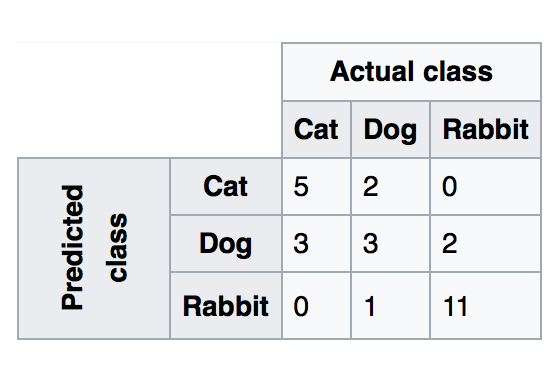

### Accuracy (How often is the classifier correct?)
#### O qual bem o classificador classificou corretamente? Baseia-se nos acertos dividido pelo total

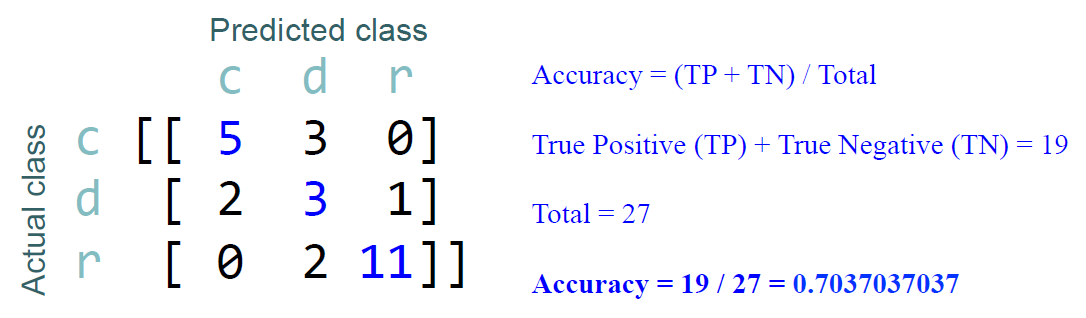

In [3]:
Image("accuracy.png")

In [4]:
metrics.accuracy_score(y, y_pred)

0.7037037037037037

In [5]:
mt.accuracy(y, y_pred)

0.7037037037037037

### Precision (When it predicts yes, how often is it correct?)
#### Dado uma classe, o quão ele classificou corretamente? Quantos gatos foram classificados corretamente?

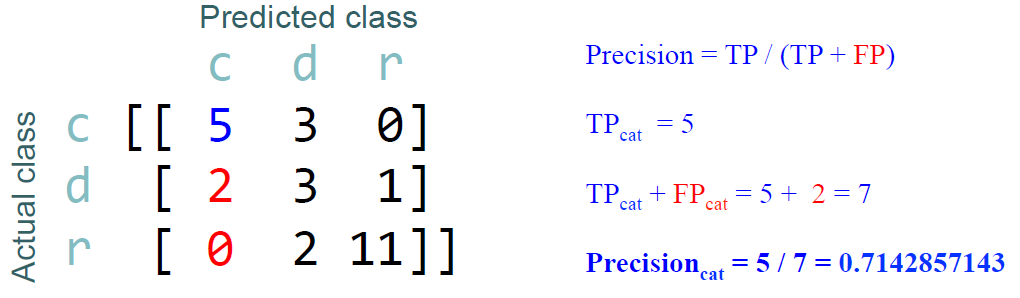

In [6]:
Image("precision.png")

In [7]:
metrics.precision_score(y, y_pred, average=None)

array([0.71428571, 0.375     , 0.91666667])

In [8]:
mt.precision(y, y_pred)

array([0.71428571, 0.375     , 0.91666667])

### Recall (When it's actually yes, how often does it predict yes?)
#### Quantos gatos foram classificados como sendo gatos através da predição?

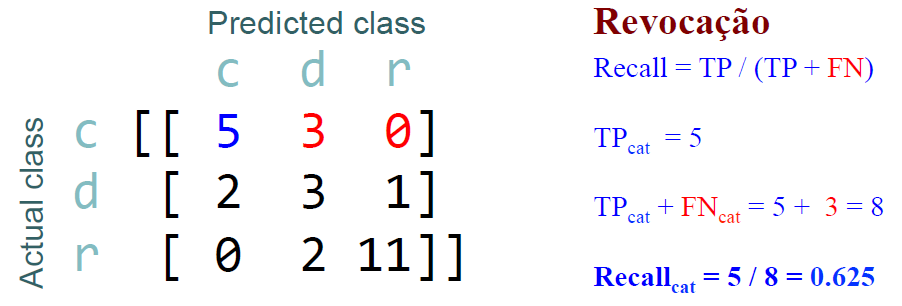

In [9]:
Image("recall.png")

In [10]:
metrics.recall_score(y, y_pred, average=None)

array([0.625     , 0.5       , 0.84615385])

In [11]:
mt.recall(y, y_pred)

array([0.625     , 0.5       , 0.84615385])

### F Score (This is a weighted average of the true positive rate (recall) and precision)

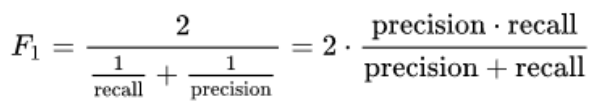

In [12]:
Image('f1.png')

In [13]:
metrics.f1_score(y, y_pred, average=None)

array([0.66666667, 0.42857143, 0.88      ])

In [14]:
mt.f1(y, y_pred)

array([0.66666667, 0.42857143, 0.88      ])

### Importando Dataset Diabetes

In [15]:
cols = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pd.read_csv('pima-indians-diabetes.csv', delimiter=',', header=None, names=cols)

In [16]:
data[data['age'] > 70].sort_values('age', ascending=False).head()

,preg,plas,pres,skin,test,mass,pedi,age,class
459,9,134,74,33,60,25.9,0.460,81,0
453,2,119,0,0,0,19.6,0.832,72,0


In [17]:
data.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [18]:
dt = data.values

X = dt[:, 0:8]
y = dt[:, 8]

### 02. Agora avalie e compare sua implementação de LogisticRegression com a implementação do scikit learn. 
* Use o dataset pima-indians-diabetes.csv em sua avaliação.
* Divida o dataset em 70% para treino e 30% para teste.
    * Estratifique seus dados, ou seja, garanta que o mesmo percentual de 0s e 1s do dataset completo, ocorra também nos dados de treino e de teste.
        * Exemplo: se no dataset há 40% de 0s e 60% de 1s, esses mesmos percentuais de 0s e 1s devem aparecer nos conjuntos de treino e teste.
        * Crie a função a seguir em resample.py:
            * split_stratified_train_test(y, perc_train, seed)
            * y - labels de cada observação contendo a classe como valor.
            * perc_train - percentual dos dados usados para treino.
            * seed - semente para geração de números randômicos.
            * saída (output): array estratificado com os índices do dados de treino e array estratificado com os índices do dados de teste.
            * Exemplo de entrada: split_stratified_train_test(y, 0.7, 0)
            * Saída - 2 arrays com índices dos dados de treino (idx_train) e de teste (idx_test), respectivamente.

In [19]:
indice = math.ceil(len(X) * 0.7) # 70% dos dados
X_train = X[:indice] # pegar os 70% dos dados no conjunto X e seus valores no y
y_train = y[:indice]

X_test = X[indice:] # pegar os 30% dos dados no conjunto X (os últimos valores) e seus valores no y
y_test = y[indice:]

In [20]:
model = linear_model.LogisticRegression()

In [21]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [22]:
y_pred = model.predict(X_test)

In [23]:
mymodel = lm.LogisticRegression()

In [24]:
mymodel.fit(X_train, y_train)

After step 1, likelihood: [-372.91318314]; accuracy: 349.0


C:\Users\Lucivan\Dropbox\UFC\2018.1 - 7º Semestre\Aprendizado de Máquina\Listas\Lista 5\mylibs\linear_model.py:17: RuntimeWarning: overflow encountered in exp
  y_hat = 1 / (1 + np.exp(-x_beta))
C:\Users\Lucivan\Dropbox\UFC\2018.1 - 7º Semestre\Aprendizado de Máquina\Listas\Lista 5\mylibs\linear_model.py:18: RuntimeWarning: divide by zero encountered in log
  likelihood = np.sum(np.log(1 - y_hat)) + np.dot(y.T, x_beta)


After step 11, likelihood: [-inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf

After step 41, likelihood: [-inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf

After step 71, likelihood: [-inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf

### 03. Avalie usando suas implementações das métricas: accuracy, precision, recall e f1_measure.
Para facilitar seu trabalho, você pode usar a função do sklearn para obter a matriz de confusão.

In [25]:
print(metrics.accuracy_score(y_test, y_pred))
print(mt.accuracy(y_test, y_pred))

0.7913043478260869
0.7913043478260869


In [26]:
print(metrics.precision_score(y_test, y_pred, average=None))
print(mt.precision(y_test, y_pred))

[0.7877095  0.80392157]
[0.7877095  0.80392157]


In [27]:
print(metrics.recall_score(y_test, y_pred, average=None))
print(mt.recall(y_test, y_pred))

[0.93377483 0.51898734]
[0.93377483 0.51898734]


In [28]:
print(metrics.f1_score(y_test, y_pred, average=None))
print(mt.f1(y_test, y_pred))

[0.85454545 0.63076923]
[0.85454545 0.63076923]


### 04. Compare os resultados de suas métricas com os resultados das implementações do scikit learn para as mesmas métricas.

Não foi possível comparar por conta do meu modelo não funcionar

### 05. Calcule a métrica AUC (Area Under Curve) usando a implementação do sklearn. 
* Dicas: 
    * use a função roc_auc_score(y_true, y_score).
    * preste atenção que y_score é diferente de y_pred.
    * Exemplo completo: http://benalexkeen.com/scoring-classifier-models-using-scikit-learn/
    * seria algo assim, usando o modelo de LogisticRegression do próprio sklearn (perceba que a classe possui o método predict_proba):
        * ...
        * y_score = model.predict_proba(X_test)[:,1]
        * fpr, tpr, thresholds = roc_curve(y_test, y_score)
        * ...

In [29]:
y_score = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_score)
roc_auc = metrics.auc(fpr, tpr)

In [30]:
metrics.roc_auc_score(y_test, y_score)

0.8696454019616062

### 06. Desenhe a curva ROC usando a implementação do sklearn.
* Dicas:
    * Exemplo completo 1: http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
    * Exemplo completo 2: http://benalexkeen.com/scoring-classifier-models-using-scikit-learn/

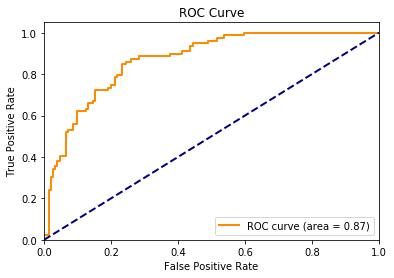

In [31]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()